### Project3

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can 
think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for 
the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the 
example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. 
Once you are satisfied with your classifier, check its final performance on the test set. 
How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?
Source: Natural Language Processing with Python, exercise 6.10.2.

from W4-part2

Project 3 - This is a Team Project!
For this project, please work with the entire class as one collaborative group! Your project should be
submitted (as a Jupyter Notebook via GitHub) by end of the due date. The group should present their
code and findings in our meetup.
The ability to be an effective member of a virtual team is highly valued in the data science job market.



###### Chapter 6: Learning to Classify Text

    
The goal of this chapter is to answer the following questions:
1. How can we identify particular features of language data that are salient for classifying it?
2. How can we construct models of language that can be used to perform language
processing tasks automatically?
3. What can we learn about language from these models?

Machine learning techniques:decision trees, naive Bayes classifiers, and maximum entropy classifiers
        

http://www.foo.be/cours/dess-20122013/b/Natural%20Language%20Processing%20with%20Python%20-%20O'Reilly2009.pdf

In [ ]:
###### Supervised Classification

Classification is the task of choosing the correct class label for a given input. 
In basic classification tasks, each input is considered in isolation from all other inputs, and the set of labels is defined in advance.

A classifier is called supervised if it is built based on training corpora containing the correct label for each input.
The framework used by supervised classification is Below

(a) Training

+++++++                                               +++++++++++++++++++++++++++++++++
+label+ --------------------------------------------->+                               +
+++++++                                               +                               +
                                                      +                               +
++++                                                  + Machine Learning algorithm    +
+  +                                                  +                               +
++++       +++++++++++++++++++                        +                               +  
input ---->+feature extractor+ -----> features -----> +++++++++++++++++++++++++++++++++
           +++++++++++++++++++



(b) Prediction

++++                                                  +++++++++++++++++++++++++++++++++           +++++++
+  +                                                  +     Classifier Model          +---------->+Label+
++++       +++++++++++++++++++                        +                               +           +++++++
input ---->+feature extractor+ -----> features -----> +++++++++++++++++++++++++++++++++
           +++++++++++++++++++



Supervised classification. (a) During training, a feature extractor is used to convert each
input value to a feature set. These feature sets, which capture the basic information about each input
that should be used to classify it, are discussed in the next section. Pairs of feature sets and labels are
fed into the machine learning algorithm to generate a model. (b) During prediction, the same feature
extractor is used to convert unseen inputs to feature sets. These feature sets are then fed into the model,
which generates predicted labels.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import (
    genesis,
    gutenberg,
    inaugural,
    nps_chat,
    treebank,
    webtext,
    wordnet,
    stopwords
)
from nltk.probability import FreqDist
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords 
from nltk.text import Text
from collections import Counter #
import re
import nltk
import string
from nltk.util import bigrams
from nltk.corpus import names
import random
#https://github.com/nltk/nltk/blob/develop/nltk/book.py
    

One more wordlist corpus is the Names Corpus, containing 8000 first names categorized by gender. 
The male and female names are stored in separate files. So, names has 02 file.txt (male and female). Let’s find names that appear in both files, i.e.,
names that are ambiguous for gender:


In [58]:
names = nltk.corpus.names
names.fileids()


['female.txt', 'male.txt']

In [59]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
[w for w in male_names if w in female_names]


['Abbey',
 'Abbie',
 'Abby',
 'Addie',
 'Adrian',
 'Adrien',
 'Ajay',
 'Alex',
 'Alexis',
 'Alfie',
 'Ali',
 'Alix',
 'Allie',
 'Allyn',
 'Andie',
 'Andrea',
 'Andy',
 'Angel',
 'Angie',
 'Ariel',
 'Ashley',
 'Aubrey',
 'Augustine',
 'Austin',
 'Averil',
 'Barrie',
 'Barry',
 'Beau',
 'Bennie',
 'Benny',
 'Bernie',
 'Bert',
 'Bertie',
 'Bill',
 'Billie',
 'Billy',
 'Blair',
 'Blake',
 'Bo',
 'Bobbie',
 'Bobby',
 'Brandy',
 'Brett',
 'Britt',
 'Brook',
 'Brooke',
 'Brooks',
 'Bryn',
 'Cal',
 'Cam',
 'Cammy',
 'Carey',
 'Carlie',
 'Carlin',
 'Carmine',
 'Carroll',
 'Cary',
 'Caryl',
 'Casey',
 'Cass',
 'Cat',
 'Cecil',
 'Chad',
 'Chris',
 'Chrissy',
 'Christian',
 'Christie',
 'Christy',
 'Clair',
 'Claire',
 'Clare',
 'Claude',
 'Clem',
 'Clemmie',
 'Cody',
 'Connie',
 'Constantine',
 'Corey',
 'Corrie',
 'Cory',
 'Courtney',
 'Cris',
 'Daffy',
 'Dale',
 'Dallas',
 'Dana',
 'Dani',
 'Daniel',
 'Dannie',
 'Danny',
 'Darby',
 'Darcy',
 'Darryl',
 'Daryl',
 'Deane',
 'Del',
 'Dell',
 'Deme

###### Data looks clean, we don't need to apply cleaning process

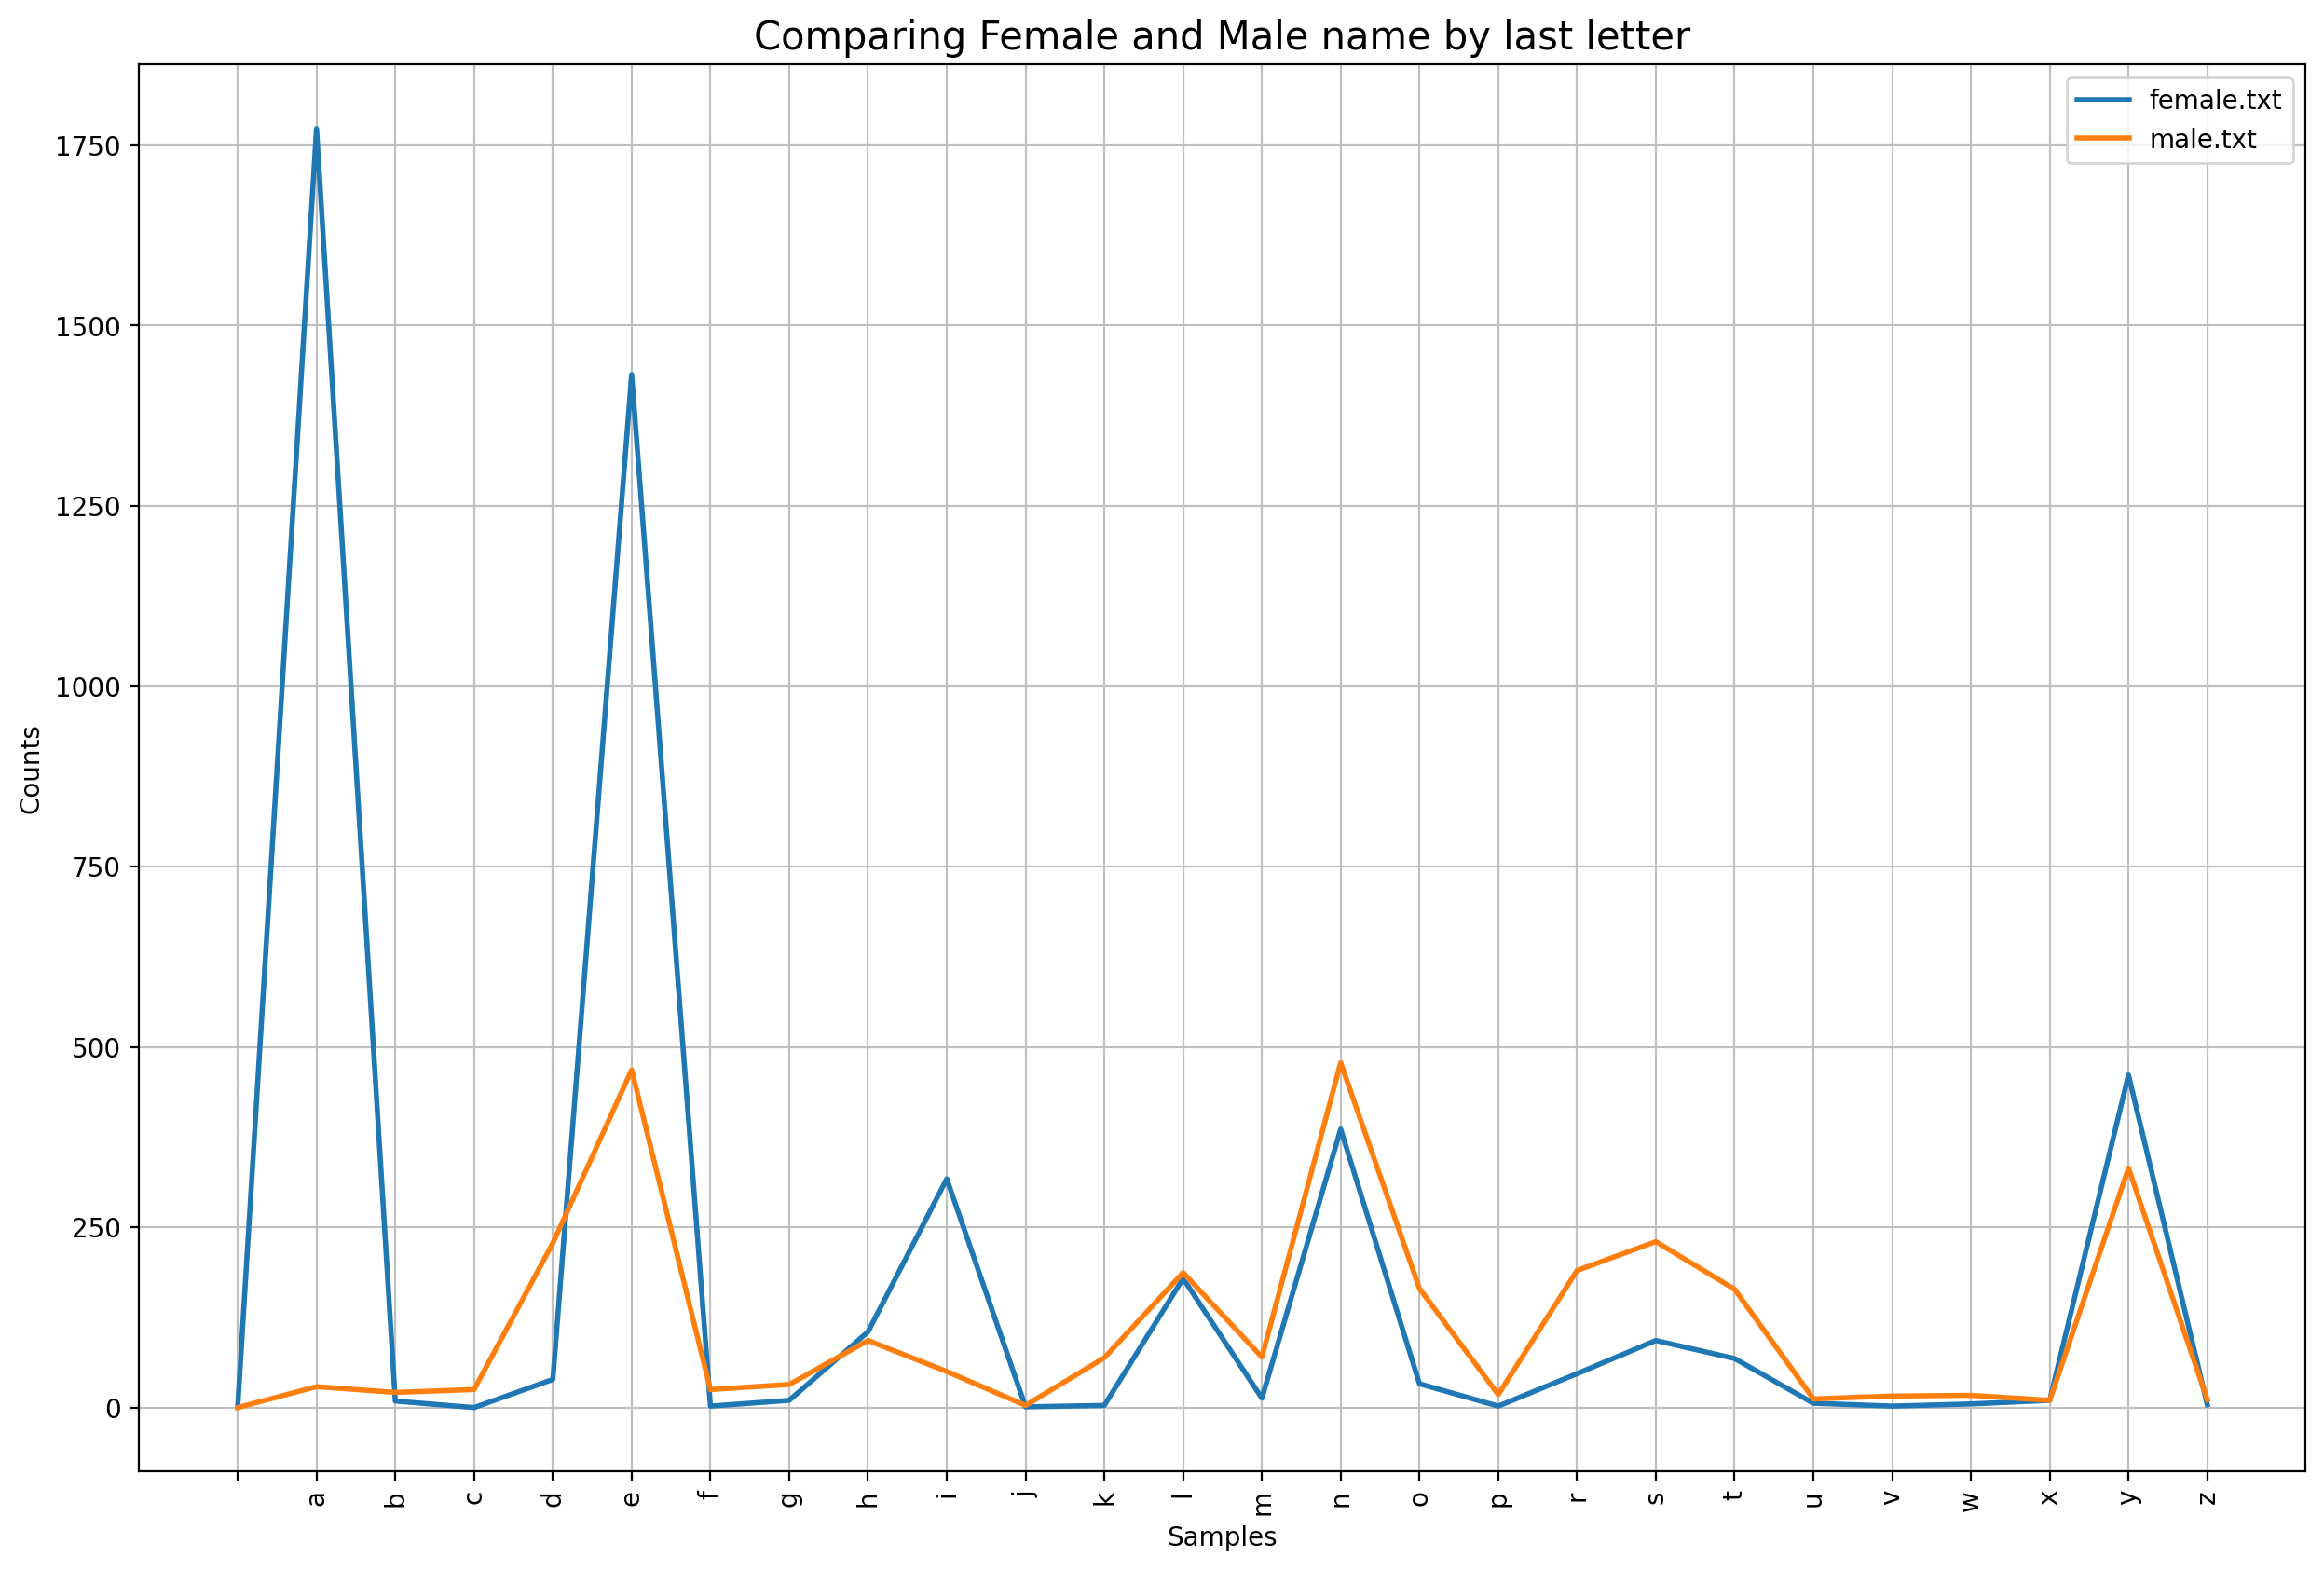

<AxesSubplot:title={'center':'Comparing Female and Male name by last letter'}, xlabel='Samples', ylabel='Counts'>

In [60]:
#It is well known that names ending in the letter a are almost female. 
#name[-1] is the last letter of name.
fig = plt.figure(1, figsize=(15,10), dpi=200)
plt.title(label="Comparing Female and Male name by last letter",fontsize=15,color="black")

cfd = nltk.ConditionalFreqDist((file_id, name[-1]) for file_id in names.fileids() for name in names.words(file_id))
cfd.plot()

The above plot is a conditional frequency distribution, showing the number of female and male names(female.txt, male.txt)
ending with each letter of the alphabet; Female names ending with a, e, or i dominate.
Names ending  in f, g, h, j, p, u,v,w,x are equally likely to be male or female.
Names ending in k, o,n, r, s, and t are likely to be male.

Creating a classifier, find tis deciding what features of the input are relevant,and how to encode those features.

In [61]:
#create a function to extract feature set (information)
def gender_features(word):
    return {'last_letter': word[-1]}

#Feature names are case-sensitive strings that typically provide a short human-readable description of the feature. 
#Feature values are values with simple types, such as Booleans, numbers, and strings.

###### Creating labels

In [65]:

names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)


Let use the feature extractor to process the names data, and divide the resulting list of feature sets into a training set 
and a test set. The training set is used to train a new “naive Bayes” classifier.
A Naive Bayes classifier is a probabilistic machine learning model that's used for classification task.
every pair of features being classified is independent of each other.
The fundamental Naive Bayes assumption is that each feature makes an:independent,equal contribution to the outcome.
    
Naive Bayes classifiers are paramaterized by two probability distributions:
- P(label) gives the probability that an input will receive each label, given no information about the input's features.

- P(fname=fval|label) gives the probability that a given feature (fname) will receive a given value (fval), given that the
        label (label).

In [66]:
featuresets = [(gender_features(n), g) for (n,g) in names]
train_set, test_set = featuresets[6900:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)


###### Testing the classifier response


In [37]:
classifier.classify(gender_features('Alex'))



'female'

Trying name = Remy, classified as female...Remy is a male name, Laura = female, Romeo = Male, how is Alex a female name? The likelyhood ratio shows that male and female are about the same 1.3 : 1.0

###### Let's see our model accuracy


In [39]:
print(nltk.classify.accuracy(classifier, test_set))


0.78


Let's see which feature contributing to our model.

In [49]:
classifier.show_most_informative_features(20)

Most Informative Features
             last_letter = 'a'            female : male   =     33.2 : 1.0
             last_letter = 'o'              male : female =     16.3 : 1.0
             last_letter = 'r'              male : female =      7.7 : 1.0
             last_letter = 'd'              male : female =      7.3 : 1.0
             last_letter = 's'              male : female =      6.3 : 1.0
             last_letter = 't'              male : female =      6.0 : 1.0
             last_letter = 'v'              male : female =      4.0 : 1.0
             last_letter = 'i'            female : male   =      3.3 : 1.0
             last_letter = 'h'              male : female =      3.2 : 1.0
             last_letter = 'g'              male : female =      2.9 : 1.0
             last_letter = 'n'              male : female =      1.8 : 1.0
             last_letter = 'e'            female : male   =      1.6 : 1.0
             last_letter = 'x'              male : female =      1.3 : 1.0

When working with large corpora, constructing a single list that contains the features of every instance can use up a large 
amount of memory. In these cases, use the function nltk.classify.apply_features, which returns an object that acts like a list
but does not store all the feature sets in memory:

In [67]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, names[6900:])
test_set = apply_features(gender_features, names[:500])

Selecting relevant features and deciding how to encode them for a learning method can have an enormous impact on the learning
method’s ability to extract a good model. Feature extractors are built through a process of trial-and-error, guided by
intuitions about what information is relevant to the problem.

In [71]:
#The featuresets returned by this feature extractor contain a large number of specific features, leading to overfitting for
#the relatively small Names Corpus.
def gender_features2(name):
 features = {}
 features["firstletter"] = name[0].lower()
 features["lastletter"] = name[-1].lower()
 for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
 return features

In [75]:
# Let's see the behavior of this second function
# Looks like function iterate from a to z
gender_features2('Alex')

{'firstletter': 'a',
 'lastletter': 'x',
 'count(a)': 1,
 'has(a)': True,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 1,
 'has(e)': True,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 0,
 'has(h)': False,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 0,
 'has(j)': False,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 1,
 'has(l)': True,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 0,
 'has(n)': False,
 'count(o)': 0,
 'has(o)': False,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 1,
 'has(x)': True,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

There are usually limits to the number of features that you should use with a given learning algorithm—if you provide too many 
features, then the algorithm will have a higher chance of relying on idiosyncrasies of your training data that don’t generalize
well to new examples.This problem is known as overfitting, and can be especially problematic when working with small training sets.

In [78]:
featuresets = [(gender_features2(n), g) for (n,g) in names]
train_set, test_set = featuresets[6900:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))


0.784


Once an initial set of features has been chosen, a very productive method for refining the feature set is error analysis. 
First, we select a development set, containing the corpus data for creating the model. This development set is then subdivided
into the training set and the dev-test set.


In [107]:
#len(names)
train_names = names[6900:]
devtest_names = names[500:6900]
test_names = names[:500]

The training set is used to train the model, and the dev-test set is used to perform error analysis. 
The test set serves in our final evaluation of the system. For reasons discussed later, it is important that we employ a 
separate dev-test set for error analysis, rather than just using the test set

In [110]:
#Having divided the corpus into appropriate datasets, we train a model using the training set,and then run it on the dev-test set
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [111]:
## let's see model accuracy
print (nltk.classify.accuracy(classifier, devtest_set))

0.75625


The model accuracy on the development set is 75.6%

Using the dev-test set, we can generate a list of the errors that the classifier makes when predicting name genders:

In [113]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )


We can then examine individual error cases where the model predicted the wrong label, and try to determine what additional 
pieces of information would allow it to make the right decision (or which existing pieces of information are tricking it into 
making the wrong decision). The feature set can then be adjusted accordingly. 
The names classifier that we have built generates about 100 errors on the dev-test corpus:
    

In [114]:
for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))


correct=female   guess=male     name=Abagael                       
correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=Addis                         
correct=female   guess=male     name=Adel                          
correct=female   guess=male     name=Adelind                       
correct=female   guess=male     name=Adriaens                      
correct=female   guess=male     name=Adrian                        
correct=female   guess=male     name=Adrien                        
correct=female   guess=male     name=Aeriel                        
correct=female   guess=male     name=Aeriell                       
correct=female   guess=male     name=Agnes                         
correct=female   guess=male     name=Aidan                         
correct=female   guess=male     name=Aigneis                       
correct=female   guess=male     name=Aileen                        
correct=female   guess=male     name=Ailyn      

Looking through this list of errors makes it clear that some suffixes that are more than one letter can be indicative of name 
genders. For example, names ending in yn appear to be predominantly female, despite the fact that names ending in n tend to be 
male;and names ending in ch are usually male, even though names that end in h tend to be female. We therefore adjust our 
feature extractor to include features for two-letter suffixes:


In [115]:
def gender_features(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}

In [118]:
#Rebuilding the classifier with the new feature extractor, we see that the performance
#on the dev-test dataset improves by almost three percentage points (from 76.5% to
#78.2%):
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))
print(nltk.classify.accuracy(classifier, train_set))
print(nltk.classify.accuracy(classifier, test_set))


0.76140625
0.7988505747126436
0.64


This error analysis procedure can then be repeated, checking for patterns in the errors that are made by the newly improved 
classifier. Each time the error analysis procedure is repeated, we should select a different dev-test/training split, 
to ensure that the classifier does not start to reflect idiosyncrasies in the dev-test set. But once we’ve used the dev-test set to help us develop the model, we can no longer trust that it will give us an accurate idea of how well the model would perform  on new data. It is therefore important to keep the test set separate, and unused, until our model development is complete. At that point, we can use the test set to evaluate how well our model will perform on new input values.


Let's modify the partition : training 0.8names, testing 0.2

In [122]:
train_names = names[6355:]
devtest_names = names[589:6355]
test_names = names[:1000]

#Having divided the corpus into appropriate datasets, we train a model using the training set,and then run it on the dev-test set
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print (nltk.classify.accuracy(classifier, devtest_set))
print (nltk.classify.accuracy(classifier, train_set))
print (nltk.classify.accuracy(classifier, test_set))


0.7669094693028096
0.7998741346758967
0.777


our model accuracy has improved

Let's modify the partition : training 0.75names, testing 0.25

In [123]:
train_names = names[5958:]
devtest_names = names[486:5958]
test_names = names[:1500]

#Having divided the corpus into appropriate datasets, we train a model using the training set,and then run it on the dev-test set
train_set = [(gender_features(n), g) for (n,g) in train_names]
devtest_set = [(gender_features(n), g) for (n,g) in devtest_names]
test_set = [(gender_features(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print (nltk.classify.accuracy(classifier, devtest_set))
print (nltk.classify.accuracy(classifier, train_set))
print (nltk.classify.accuracy(classifier, test_set))


0.7671783625730995
0.7960725075528701
0.782


In [ ]:
The model accuracy is 78.2% which is not bad. It seems like , having a good test data improve the model accuracy.